In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
path = r'C:\Users\shreyansh verma\Documents\VS Code Projects\DataSet\CA_housing.csv\CA_housing.csv'
dataset = pd.read_csv(path)
print(dataset.columns)
# dataset

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


In [3]:
# Defining X and y
cols = list(dataset.drop('median_house_value',axis=1))
X = pd.DataFrame(dataset[cols])
y = dataset.median_house_value

# Spliting the Data
X_train,X_val, y_train,y_val=train_test_split(X, y,test_size=0.2, random_state=0)


In [4]:
# Making a list of columns which are in type('object)
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['ocean_proximity']


In [5]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_val = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_val.columns = OH_X_val.columns.astype(str)



c:\Users\shreyansh verma\Documents\VS Code Projects\env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

house_price_model = RandomForestRegressor (random_state=1)
house_price_model.fit(OH_cols_train,y_train)
preds = house_price_model.predict(OH_cols_valid)

print(r2_score(y_val,preds)*100,"% Accuracy",sep='')

23.34589637394985% Accuracy


In [7]:
preds_df = pd.DataFrame(preds)
preds_df.columns= ['Predictions']

y_val_df = pd.DataFrame(y_val)
y_val_df.columns = ['Actual Result']

y_val_df = y_val_df.reset_index(drop=True)
preds_df = preds_df.reset_index(drop=True)

In [8]:
import numpy as np

data = pd.concat([y_val_df, preds_df],axis='columns')
data = np.log(data)

<Axes: title={'center': 'CA House Prediction Model'}>

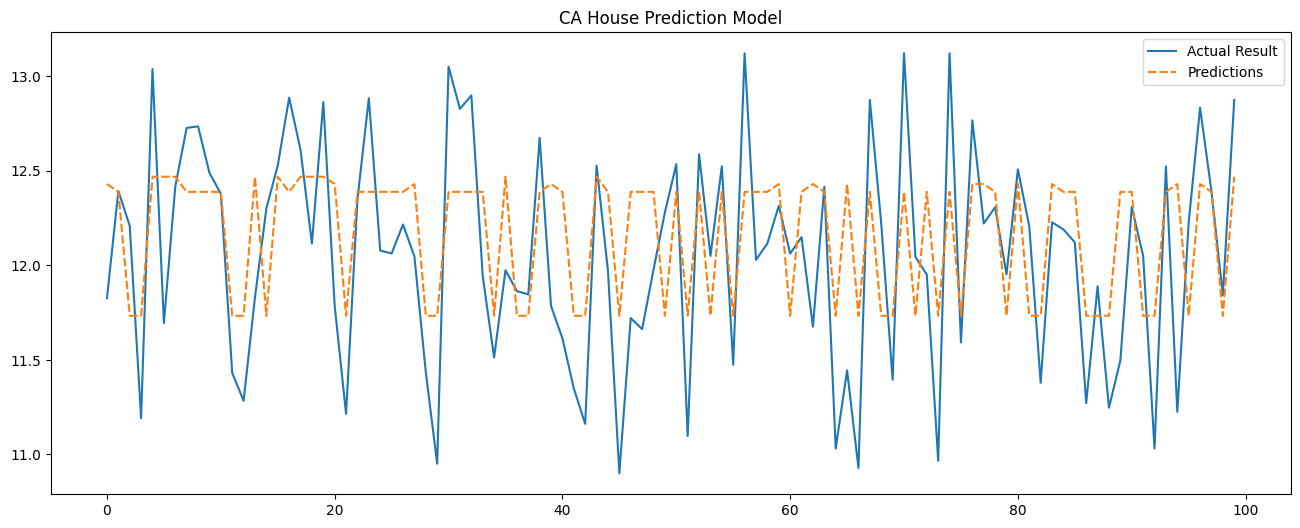

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(16,6))
plt.title('CA House Prediction Model')
sns.lineplot(data = data.head(100))
